In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np# 元となる画像の読み込み
%matplotlib inline

Using TensorFlow backend.


In [6]:
# opencv画像入力用
from IPython.display import display, Image

def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
    
# display_cv_image(bef_img, '.jpg')

In [7]:
# 元となる画像の読み込み
bef_img = cv2.imread( './img/bef.JPG', cv2.IMREAD_GRAYSCALE)
aft_img = cv2.imread('./img/aft.JPG', cv2.IMREAD_GRAYSCALE) 

In [8]:
NN = Sequential() #空のニューラルネット
NN.add(Dense(1000, input_dim=960))
NN.add(Activation('sigmoid'))
NN.add(Dense(960))
NN.add(Activation('softmax'))
NN.summary()
NN.compile(optimizer='adam',loss='categorical_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              961000    
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 960)               960960    
_________________________________________________________________
activation_2 (Activation)    (None, 960)               0         
Total params: 1,921,960
Trainable params: 1,921,960
Non-trainable params: 0
_________________________________________________________________


In [72]:
NN.fit(aft_img, bef_img, epochs=5000)

Epoch 1/10
1280/1280 [==============================] - 1s - loss: 21431.3008     
Epoch 2/10
1280/1280 [==============================] - 1s - loss: 21431.2869     
Epoch 3/10
1280/1280 [==============================] - 1s - loss: 21431.2867     
Epoch 4/10
1280/1280 [==============================] - 1s - loss: 21431.2869     
Epoch 5/10
1280/1280 [==============================] - 1s - loss: 21431.2870     
Epoch 6/10
1280/1280 [==============================] - 1s - loss: 21431.2871     
Epoch 7/10
1280/1280 [==============================] - 1s - loss: 21431.2866     
Epoch 8/10
1280/1280 [==============================] - 1s - loss: 21431.2868     
Epoch 9/10
1280/1280 [==============================] - 1s - loss: 21431.2866     
Epoch 10/10
1280/1280 [==============================] - 1s - loss: 21431.2870     


In [10]:
a = NN.predict(bef_img)

In [11]:
#intに変換する.グレースケールはintだから
a = np.floor(a)
a = a.astype(np.int)

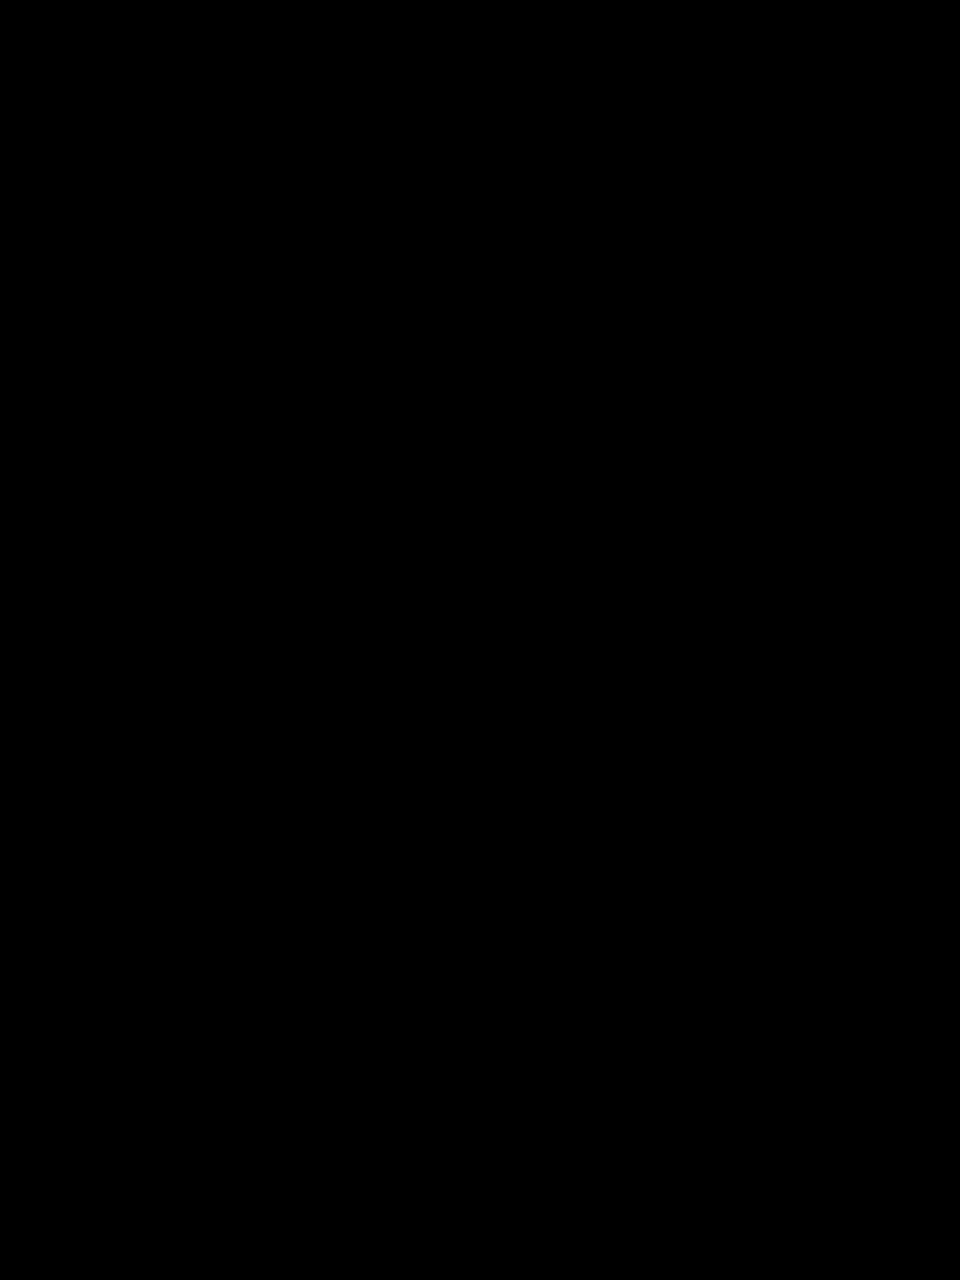

In [16]:
cv2.imwrite("./img/output.jpg", a)
# 元となる画像の読み込み
img = cv2.imread("./img/output.jpg")
display_cv_image(img)